# Make sure your Config File is set!!

In [1]:
!pip install requests

In [25]:
import requests 
import datetime
import base64
import pandas as pd
from urllib.parse import urlencode
import matplotlib.pyplot as plt
import numpy as np

# from config import client_id
# from config import client_secret

client_id = "61571ab2d97c41c79ef2c934842244f6"
client_secret = "13573e14e35c4a3ea20a280c0e9f49ae"

In [3]:
countries_df = pd.read_csv("../Resources/ISO_Country_Codes.csv")
countries_df = countries_df.drop(columns=["GEC","Alpha 2","Numeric","STANAG","INTERNET","COMMENT"])
countries_df = countries_df.dropna()
countries_df = countries_df.loc[countries_df["Alpha 1"] != '-']
iso_code = countries_df["Alpha 1"]

iso_code_head = iso_code.head()
iso_code_head
iso_code.to_csv("iso_code.csv")


In [4]:
iso_code.to_csv("iso_code.csv")

In [5]:
test_df = pd.DataFrame({
    "Album Name": ["Test Name", "Test Name"],
    "Album ID": ["Test ID", "Test ID"],
    "Album Genre": ["Test Genre","Test Genre"],
    "Album Popularity": ["Test POP", "Test POP"],
    "Avail Markets": [["AD","AE", "AF","ZM","AL","DZ"],["AD","AE","AF","ZM","AL","DZ"]]
    })
                
test_df

,Album Name,Album ID,Album Genre,Album Popularity,Avail Markets
0,Test Name,Test ID,Test Genre,Test POP,"[AD, AE, AF, ZM, AL, DZ]"
1,Test Name,Test ID,Test Genre,Test POP,"[AD, AE, AF, ZM, AL, DZ]"


In [6]:
len(test_df["Avail Markets"][0])

6

In [7]:
next_code = 0
next_code = (next_code + 1)
next_code = (next_code + 1)
next_code

2

In [8]:
next_code = 0


while next_code < len(test_df["Avail Markets"][0]):
    for market in test_df["Avail Markets"]:
        for code in iso_code_head:
            country = test_df["Avail Markets"][0][next_code]
            if country == code:
                test_df[f"{country}"] = country
    next_code = (next_code + 1)    
    
test_df

,Album Name,Album ID,Album Genre,Album Popularity,Avail Markets,AD,AF,AL,DZ
0,Test Name,Test ID,Test Genre,Test POP,"[AD, AE, AF, ZM, AL, DZ]",AD,AF,AL,DZ
1,Test Name,Test ID,Test Genre,Test POP,"[AD, AE, AF, ZM, AL, DZ]",AD,AF,AL,DZ


In [9]:
class SpotifyAPI(object):
    access_token = None 
    access_token_expires = datetime.datetime.now()
    access_token_did_expire = True
    client_id = None 
    client_secret = None 
    token_url = "https://accounts.spotify.com/api/token"
    
    def __init__(self, client_id, client_secret, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.client_id = client_id
        self.client_secret = client_secret
    
    def get_client_credentials(self):
        """
        Returns a base 64 encoded string
        """
        client_id = self.client_id
        client_secret = self.client_secret
        
        if client_secret == None or client_id == None:
            raise Exception("You must set client_id and client_secret")
        
        client_creds = f"{client_id}:{client_secret}"
        client_creds_b64 = base64.b64encode(client_creds.encode())
        return client_creds_b64.decode()
        
    def get_token_headers(self):
        client_creds_b64 = self.get_client_credentials()
        return {
            "Authorization" : f"Basic {client_creds_b64}"
        }
    
    def get_token_data(self):
        return {
            "grant_type" : "client_credentials"
        }
    
    def perform_auth(self):
        token_url = self.token_url
        token_data = self.get_token_data()
        token_headers = self.get_token_headers()
        r = requests.post(token_url, data = token_data, headers = token_headers)
        if r.status_code not in range(200, 299): 
            return False
        data = r.json()
        now = datetime.datetime.now()
        access_token = data['access_token']
        expires_in = data['expires_in'] # seconds 
        expires = now + datetime.timedelta(seconds = expires_in)
        self.access_token = access_token
        self.access_token_expires = expires
        self.access_token_did_expire = expires < now
        return True

In [10]:
spotify = SpotifyAPI(client_id, client_secret)

In [11]:
spotify.perform_auth()

True

In [12]:
access_token = spotify.access_token
access_token

'BQDE_j5xsWpWLxsH--enRQD_DUARoNcZR_sO8HxSlwalgKEywpy3OlZUBJde7ic3kSPWcMPAODpDpaIXeS4'

In [13]:
# album_ids = ["3P5WIUJO0Ots1lQx09TOxk"]

In [14]:
album_available_markets_list = []
album_genres_list = []
album_popularity_list = []
album_name_list = []
album_id_list = []

In [15]:
### ALBUM API

headers = {
    "Authorization" : f"Bearer {access_token}"
}

endpoint = "https://api.spotify.com/v1/albums?"
data = urlencode({"ids": "3P5WIUJO0Ots1lQx09TOxk"
                 })

lookup_url = f"{endpoint}{data}"

response = requests.get(lookup_url, headers=headers).json()

album_available_markets_list.append(response["albums"][0]["available_markets"])

album_genres_list.append(response["albums"][0]["genres"])

album_popularity_list.append(response["albums"][0]["popularity"])

album_name_list.append(response["albums"][0]["name"])

album_id_list.append(response["albums"][0]["id"])

#print(json.dumps(response, indent=4, sort_keys=True))
# print(album_available_markets_list)
# print(album_genres_list)
# print(album_popularity_list)
# print(album_name_list)
# print(album_id_list)


In [16]:
album_available_markets_list = []
album_genres_list = []
album_popularity_list = []
album_name_list = []
album_id_list = []

album_dummy_data = {
    "album_id" : ["3P5WIUJO0Ots1lQx09TOxk",
                  "6pbBHbkfs6i0JzhWjDmvb1",
                  "1CQFYWHVdRypCsU2IU80t1",
                  "3SGFxGF2loXeOFZtKvdmxo",
                 "5vqILcEeCT0N1DeJBsLrGE",
                 "76ME7LgGQq5fuTy9wWBHpq"]
} 


album_dummy_list = ["3P5WIUJO0Ots1lQx09TOxk",
                  "6pbBHbkfs6i0JzhWjDmvb1",
                  "1CQFYWHVdRypCsU2IU80t1",
                  "3SGFxGF2loXeOFZtKvdmxo",
                 "5vqILcEeCT0N1DeJBsLrGE",
                 "76ME7LgGQq5fuTy9wWBHpq"]

album_dummy_df = pd.DataFrame(album_dummy_data)
album_dummy_list

['3P5WIUJO0Ots1lQx09TOxk',
 '6pbBHbkfs6i0JzhWjDmvb1',
 '1CQFYWHVdRypCsU2IU80t1',
 '3SGFxGF2loXeOFZtKvdmxo',
 '5vqILcEeCT0N1DeJBsLrGE',
 '76ME7LgGQq5fuTy9wWBHpq']

In [17]:
### ALBUM API

headers = {
    "Authorization" : f"Bearer {access_token}"
}

for album in album_dummy_list:
    
    album_id = album
    
    endpoint = "https://api.spotify.com/v1/albums?"
    data = urlencode({"ids": album_id})
    
    lookup_url = f"{endpoint}{data}"

    response = requests.get(lookup_url, headers=headers).json()
    
    try:
        album_available_markets_list.append(response["albums"][0]["available_markets"])
        album_genres_list.append(response["albums"][0]["genres"])
        album_popularity_list.append(response["albums"][0]["popularity"])
        album_name_list.append(response["albums"][0]["name"])
        album_id_list.append(response["albums"][0]["id"])
    except KeyError:
         print(f" Failure on {album_id}")

In [18]:
album_api_df = pd.DataFrame({
    "Album Name": album_name_list,
    "Album ID": album_id_list,
    "Album Genre": album_genres_list,
    "Album Popularity": album_popularity_list,
    "Album Markets": album_available_markets_list
})

album_api_df

,Album Name,Album ID,Album Genre,Album Popularity,Album Markets
0,Lonely (with benny blanco),3P5WIUJO0Ots1lQx09TOxk,[],75,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
1,Fake,6pbBHbkfs6i0JzhWjDmvb1,[],69,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
2,By Yourself (feat. Jhené Aiko & Mustard),1CQFYWHVdRypCsU2IU80t1,[],65,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
3,Fake It Flowers,3SGFxGF2loXeOFZtKvdmxo,[],63,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
4,Before,5vqILcEeCT0N1DeJBsLrGE,[],65,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
5,Iced Out Audemars (Remix),76ME7LgGQq5fuTy9wWBHpq,[],52,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."


In [19]:
album_api_df.to_csv("album_api_df.csv")

In [22]:
next_code = 0
while next_code < len(album_api_df["Album Markets"][0]):
    for market in album_api_df["Album Markets"]:
        for code in iso_code:
            country = album_api_df["Album Markets"][0][next_code]
            isocode = code
            if country == code:
                album_api_df[f"{country}"] = 1
            else:
                album_api_df[f"{isocode}"] = 0
    next_code = (next_code + 1)
    
next_code = 0
while next_code < len(album_api_df["Album Markets"][0]):
    for market in album_api_df["Album Markets"]:
        for code in iso_code:
            country = album_api_df["Album Markets"][0][next_code]
            isocode = code
            if country == code:
                album_api_df[f"{country}"] = 1               
    next_code = (next_code + 1)    
    
cleaned_df = album_api_df.drop(columns="Album Markets")
cleaned_df

,Album Name,Album ID,Album Genre,Album Popularity,AF,AL,DZ,AS,AD,AO,...,UZ,VU,VE,VN,VI,WF,EH,YE,ZM,ZW
0,Lonely (with benny blanco),3P5WIUJO0Ots1lQx09TOxk,[],75,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,Fake,6pbBHbkfs6i0JzhWjDmvb1,[],69,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,By Yourself (feat. Jhené Aiko & Mustard),1CQFYWHVdRypCsU2IU80t1,[],65,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,Fake It Flowers,3SGFxGF2loXeOFZtKvdmxo,[],63,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,Before,5vqILcEeCT0N1DeJBsLrGE,[],65,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,Iced Out Audemars (Remix),76ME7LgGQq5fuTy9wWBHpq,[],52,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
cleaned_df.describe()

,Album Popularity,AF,AL,DZ,AS,AD,AO,AI,AQ,AG,...,UZ,VU,VE,VN,VI,WF,EH,YE,ZM,ZW
count,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
mean,64.833333,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
std,7.600439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,52.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,63.500000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,65.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,68.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,75.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


([<matplotlib.axis.XTick at 0x7fa9e9e85be0>,
 [Text(0, 0, 'Lonely (with benny blanco)'),
  Text(1, 0, 'Fake'),
  Text(2, 0, 'By Yourself (feat. Jhené Aiko & Mustard)'),
  Text(3, 0, 'Fake It Flowers'),
  Text(4, 0, 'Before'),
  Text(5, 0, 'Iced Out Audemars (Remix)')])

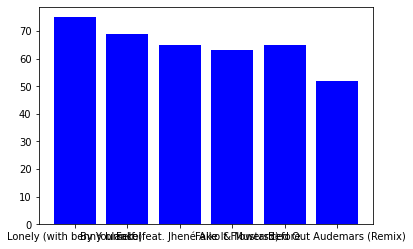

In [29]:
x_axis = np.arange(len(cleaned_df["Album Name"]))
tick_locations = [value for value in x_axis]
albums = cleaned_df["Album Name"]
pop = cleaned_df["Album Popularity"]

plt.bar(x_axis, pop, color="b", align="center")
plt.xticks(tick_locations, albums)

In [30]:
avail_only = cleaned_df.drop(columns=["Album Popularity","Album Name","Album ID","Album Genre"])
avail_only

,AF,AL,DZ,AS,AD,AO,AI,AQ,AG,AR,...,UZ,VU,VE,VN,VI,WF,EH,YE,ZM,ZW
0,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
